# Midterm Project CS675 Scaleable Database


 
### Analyzing New York City Data utilizing SQL, Python, and Version Control


## Project Overview

**The main goal of this project is to analyze three NYPD datasets to gain insights about public safety in New York City. Data Science tools such Python, SQL, and Git to clean, retrieve, and analyze data on the following dataset**




**Project Goal**: - The end goal is to uncover patterns and trends that can help law enforcement and policymakers make data-driven decisions and keep New York City residence safety and reduce the crime

#### Data Sets use for this project __(https://catalog.data.gov/dataset)__

1. NYPD Hatecrime
2. NYPD Shooting
3. NYPD Arrest


#### Procedures

1. Import the necessary Libraries
2. Read in an view all three data set
3. Clean and Transform Data set using Pandas and numpy libraries
3. Data Exploration using Matplotlib and Seaborn libraries
4. Conclusion
5. Limitation and Recomemdation


### Team Members: Nuzhut Prova, Ramya and Sunita Inderjit, Srikant Reddy


#  NYPD Shooting

#### Business Questions.


1.  How crimes are varied in each year
2.  Which Sex has highly impacted.
3.  Which race is mostly are perperators or victims.
4.  How many incidents are recorded as Statstical murders.


In [2]:
# import necessary libraries
import pandas as pd
import io
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [34]:
data = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [4]:
data.head(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [5]:
data.shape

(27312, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [10]:
data.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401608,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377757,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335938,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570312,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468750,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [11]:
data.corr()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
INCIDENT_KEY,1.000000,-0.033391,0.019111,0.000715,0.001852,0.042886,0.042952,0.002145
PRECINCT,-0.033391,1.000000,-0.060311,0.011547,0.192191,-0.649657,-0.650043,0.191037
JURISDICTION_CODE,0.019111,-0.060311,1.000000,-0.035293,-0.092267,-0.029638,-0.029571,-0.092477
STATISTICAL_MURDER_FLAG,0.000715,0.011547,-0.035293,1.000000,0.001846,-0.006669,-0.006686,0.001807
X_COORD_CD,0.001852,0.192191,-0.092267,0.001846,1.000000,0.139793,0.139211,0.999998
Y_COORD_CD,0.042886,-0.649657,-0.029638,-0.006669,0.139793,1.000000,1.000000,0.141698
Latitude,0.042952,-0.650043,-0.029571,-0.006686,0.139211,1.000000,1.000000,0.141115
Longitude,0.002145,0.191037,-0.092477,0.001807,0.999998,0.141698,0.141115,1.000000


# Review Data Quality

### Handle missing filed values

In [27]:
data.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
LOC_OF_OCCUR_DESC           object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOC_CLASSFCTN_DESC          object
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [13]:
data.duplicated().sum()

0

In [29]:
data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

### Handling Missing values

* For categorical columns like LOC_OF_OCCUR_DESC, LOC_CLASSFCTN_DESC, and LOCATION_DESC, I considered replacing missing values with a placeholder like "Unknown" or "Not Specified."

* columns like JURISDICTION_CODE, Latitude, Longitude, and Lon_Lat, imputation methods is employed

* PERP_AGE_GROUP, PERP_SEX, PERP_RACE imputed with the median or mode, depending on the distribution.I used mode imputation

In [30]:
data.replace('(null)', np.nan, inplace=True)


In [31]:

# Categorical columns replacement

categorical_columns = ['LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC']
data[categorical_columns] = data[categorical_columns].fillna("Unknown")  # Replace missing values with "Unknown"


In [32]:

# Imputation for numerical columns

numerical_columns = ['JURISDICTION_CODE', 'Latitude', 'Longitude']
for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)  # Impute missing numerical values with the mean


In [33]:

# Handling PERP_AGE_GROUP, PERP_SEX, PERP_RACE
# Impute mode for categorical data (SEX, RACE)


categorical_impute_columns = ['PERP_SEX', 'PERP_RACE']
for column in categorical_impute_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

    
age_column = 'PERP_AGE_GROUP'
mode_age = data[age_column].mode()[0]
data[age_column].fillna(mode_age, inplace=True)

In [34]:
lon_lat_column = 'Lon_Lat'

mode_lonlat = data[lon_lat_column].mode()
mode_lonlat_value = mode_lonlat[0]  # Retrieve the mode value from the Series

data[lon_lat_column].fillna(mode_lonlat_value, inplace=True)

In [35]:
data.isna().sum()

INCIDENT_KEY               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
LOC_OF_OCCUR_DESC          0
PRECINCT                   0
JURISDICTION_CODE          0
LOC_CLASSFCTN_DESC         0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
dtype: int64

## Inconsistencies -- Correct Data format

In [39]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
LOC_OF_OCCUR_DESC           object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOC_CLASSFCTN_DESC          object
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object


In [40]:
# Convert 'OCCUR_DATE' to datetime
data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'])


# Convert 'OCCUR_TIME' to time
data['OCCUR_TIME'] = pd.to_datetime(data['OCCUR_TIME'], format='%H:%M:%S').dt.time


# Convert location columns to categorical
location_columns = ['LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'Lon_Lat']
data[location_columns] = data[location_columns].astype('category')

In [41]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
INCIDENT_KEY                        int64
OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                               object
LOC_OF_OCCUR_DESC                category
PRECINCT                            int64
JURISDICTION_CODE                 float64
LOC_CLASSFCTN_DESC               category
LOCATION_DESC                    category
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
X_COORD_CD                        float64
Y_COORD_CD                        float64
Latitude                          float64
Longitude                         float64
Lon_Lat                          category
dtype: object


In [42]:
# Replace non-standard values with mode in 'VIC_AGE_GROUP' column
vic_mode = data['VIC_AGE_GROUP'].mode()[0]  # Calculate the mode
data['VIC_AGE_GROUP'] = data['VIC_AGE_GROUP'].replace(['1022'], vic_mode)


# Replace non-standard values with mode in 'PERP_AGE_GROUP' column
perp_mode = data['PERP_AGE_GROUP'].mode()[0]  # Calculate the mode
data['PERP_AGE_GROUP'] = data['PERP_AGE_GROUP'].replace(['940', '224', '1020', '1022'], perp_mode)


In [43]:
numerical_columns = data.select_dtypes(include=['float64']).columns


In [44]:
numerical_columns

Index(['JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude'],
      dtype='object')

## Remove outliers

In [45]:
numerical_columns = data.select_dtypes(include=['float64']).columns

z_scores = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()
threshold = 3
outlier_mask = (abs(z_scores) > threshold).any(axis=1)

# Filter the DataFrame for outlier removal in numeric columns only
data = data.loc[~outlier_mask]

In [46]:
data.head(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,2021-05-27,21:30:00,QUEENS,Unknown,105,0.0,Unknown,Unknown,False,...,M,BLACK,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,2014-06-27,17:40:00,BRONX,Unknown,40,0.0,Unknown,Unknown,False,...,M,BLACK,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,2015-11-21,03:56:00,QUEENS,Unknown,108,0.0,Unknown,Unknown,True,...,M,BLACK,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,2015-10-09,18:30:00,BRONX,Unknown,44,0.0,Unknown,Unknown,False,...,M,BLACK,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,2009-02-19,22:58:00,BRONX,Unknown,47,0.0,Unknown,Unknown,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


> Inconsistencies, missing values are handled

## Data Visualization

1. Stacked Barchart -- Helps understand the distribution of crime incidents across different boroughs of NYC, providing insights into the comparative safety or prevalence of incidents in various areas.

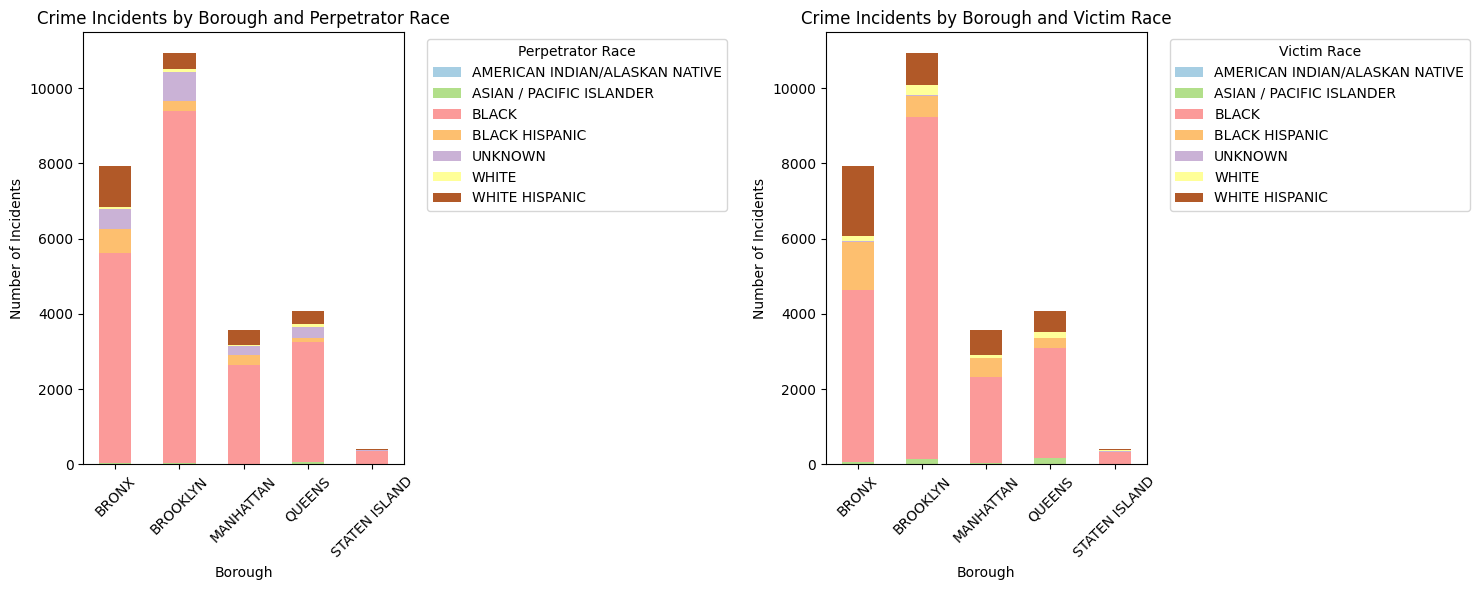

In [47]:
# Grouping by 'BORO' and 'PERP_RACE' and getting the value counts
grouped_perpetrator = data.groupby(['BORO', 'PERP_RACE']).size().unstack()



# Grouping by 'BORO' and 'VIC_RACE' and getting the value counts
grouped_victim = data.groupby(['BORO', 'VIC_RACE']).size().unstack()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))




grouped_perpetrator.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[0])
axes[0].set_title('Crime Incidents by Borough and Perpetrator Race')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Number of Incidents')
axes[0].set_xticklabels(grouped_perpetrator.index, rotation=45)
axes[0].legend(title='Perpetrator Race', bbox_to_anchor=(1.05, 1), loc='upper left')



grouped_victim.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[1])
axes[1].set_title('Crime Incidents by Borough and Victim Race')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Number of Incidents')
axes[1].set_xticklabels(grouped_victim.index, rotation=45)
axes[1].legend(title='Victim Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


> From the above graph, we can clearly see that number of crime Incidents by Borough for  both Victim race and Perpetrator race.

From the chart we can analyse that
* Brooklyn has the highest crime incidents and STATEN ISLAND has the least number of crimes.
* Most affected race from either Victim or perperator is BLACK


2. Line graph -- Helps in identifying trends and patterns in crime incidents over time. Understanding seasonal variations or long-term trends is crucial for predictive analysis and resource allocation.

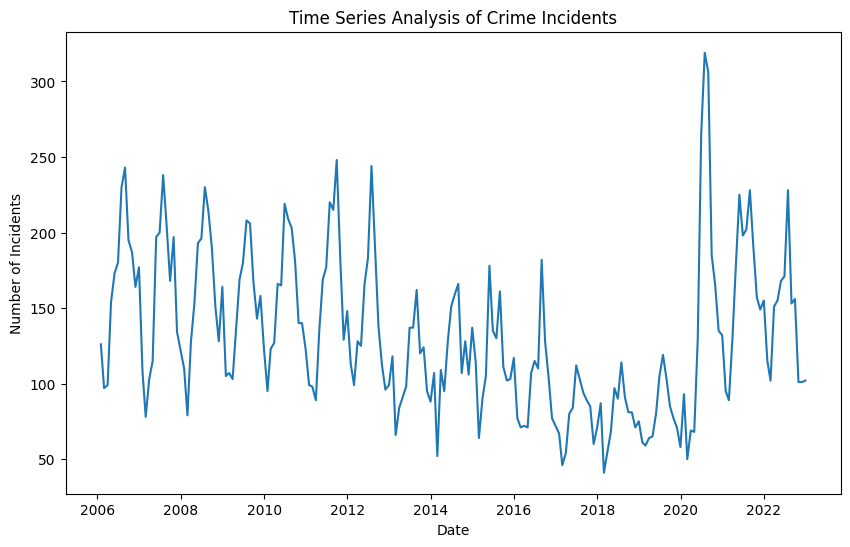

In [48]:
plt.figure(figsize=(10, 6))
data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'])
sns.lineplot(x='OCCUR_DATE', y='INCIDENT_KEY', data=data.resample('M', on='OCCUR_DATE').count())
plt.title('Time Series Analysis of Crime Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


Text(0, 0.5, 'Count')

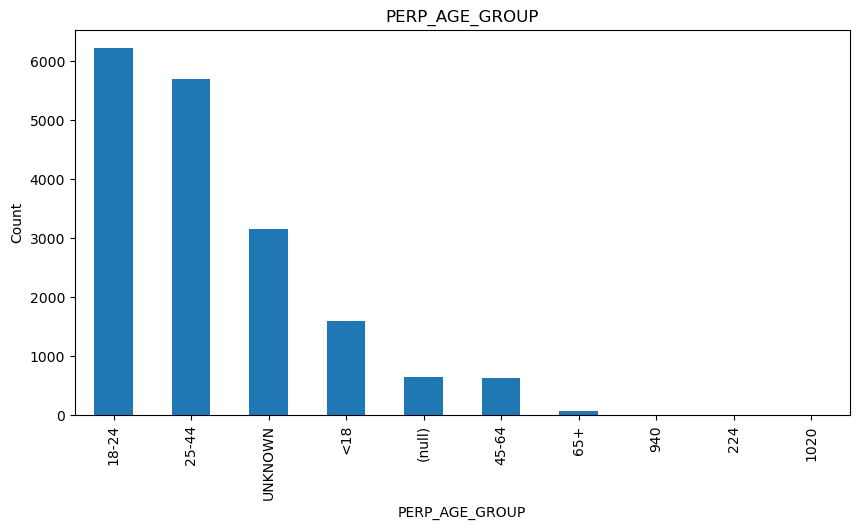

In [16]:
data['PERP_AGE_GROUP'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('PERP_AGE_GROUP')
plt.xlabel('PERP_AGE_GROUP')
plt.ylabel('Count')

Text(0, 0.5, 'LOC_OF_OCCUR_DESC')

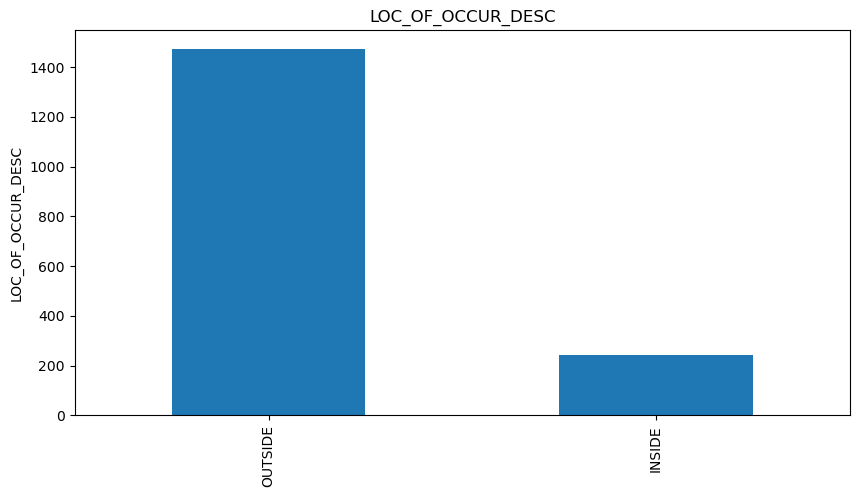

In [17]:
data['LOC_OF_OCCUR_DESC'].value_counts().head(12).plot(kind='bar', figsize=(10,5))
plt.title('LOC_OF_OCCUR_DESC')
plt.ylabel('LOC_OF_OCCUR_DESC')

Text(0, 0.5, 'BORO')

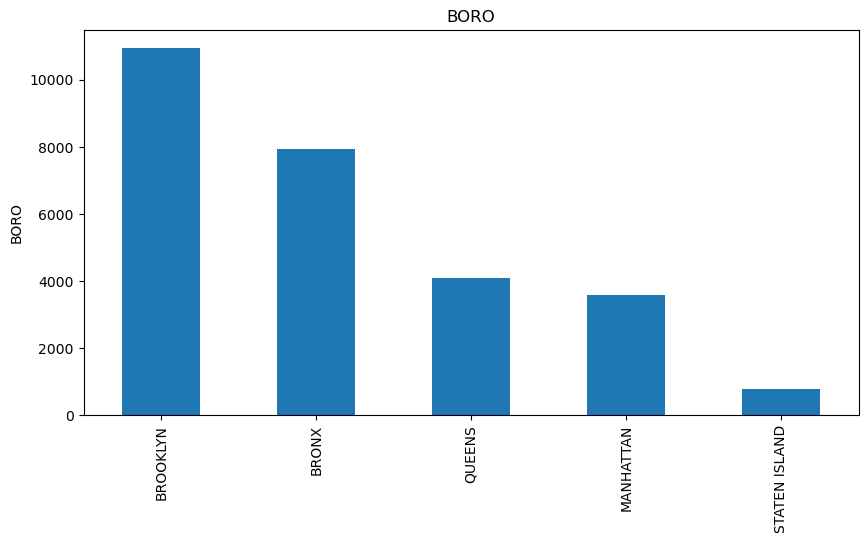

In [22]:
data['BORO'].value_counts().head(12).plot(kind='bar', figsize=(10,5))
plt.title('BORO')
plt.ylabel('BORO')

In [25]:
data.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

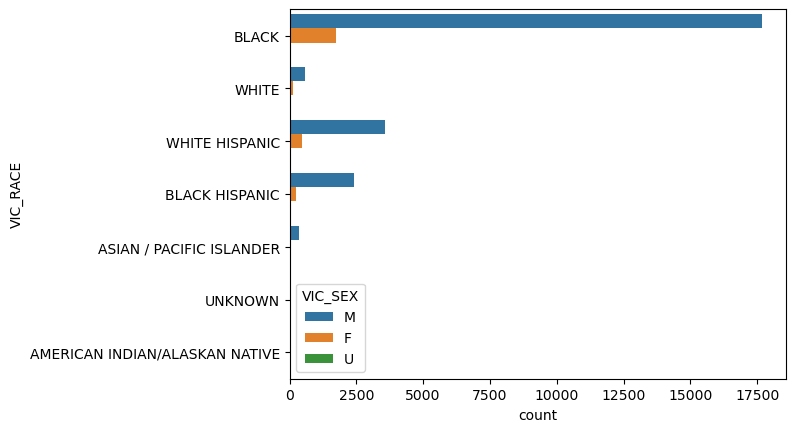

In [30]:
sns.countplot(y='VIC_RACE',data=data, hue ='VIC_SEX');

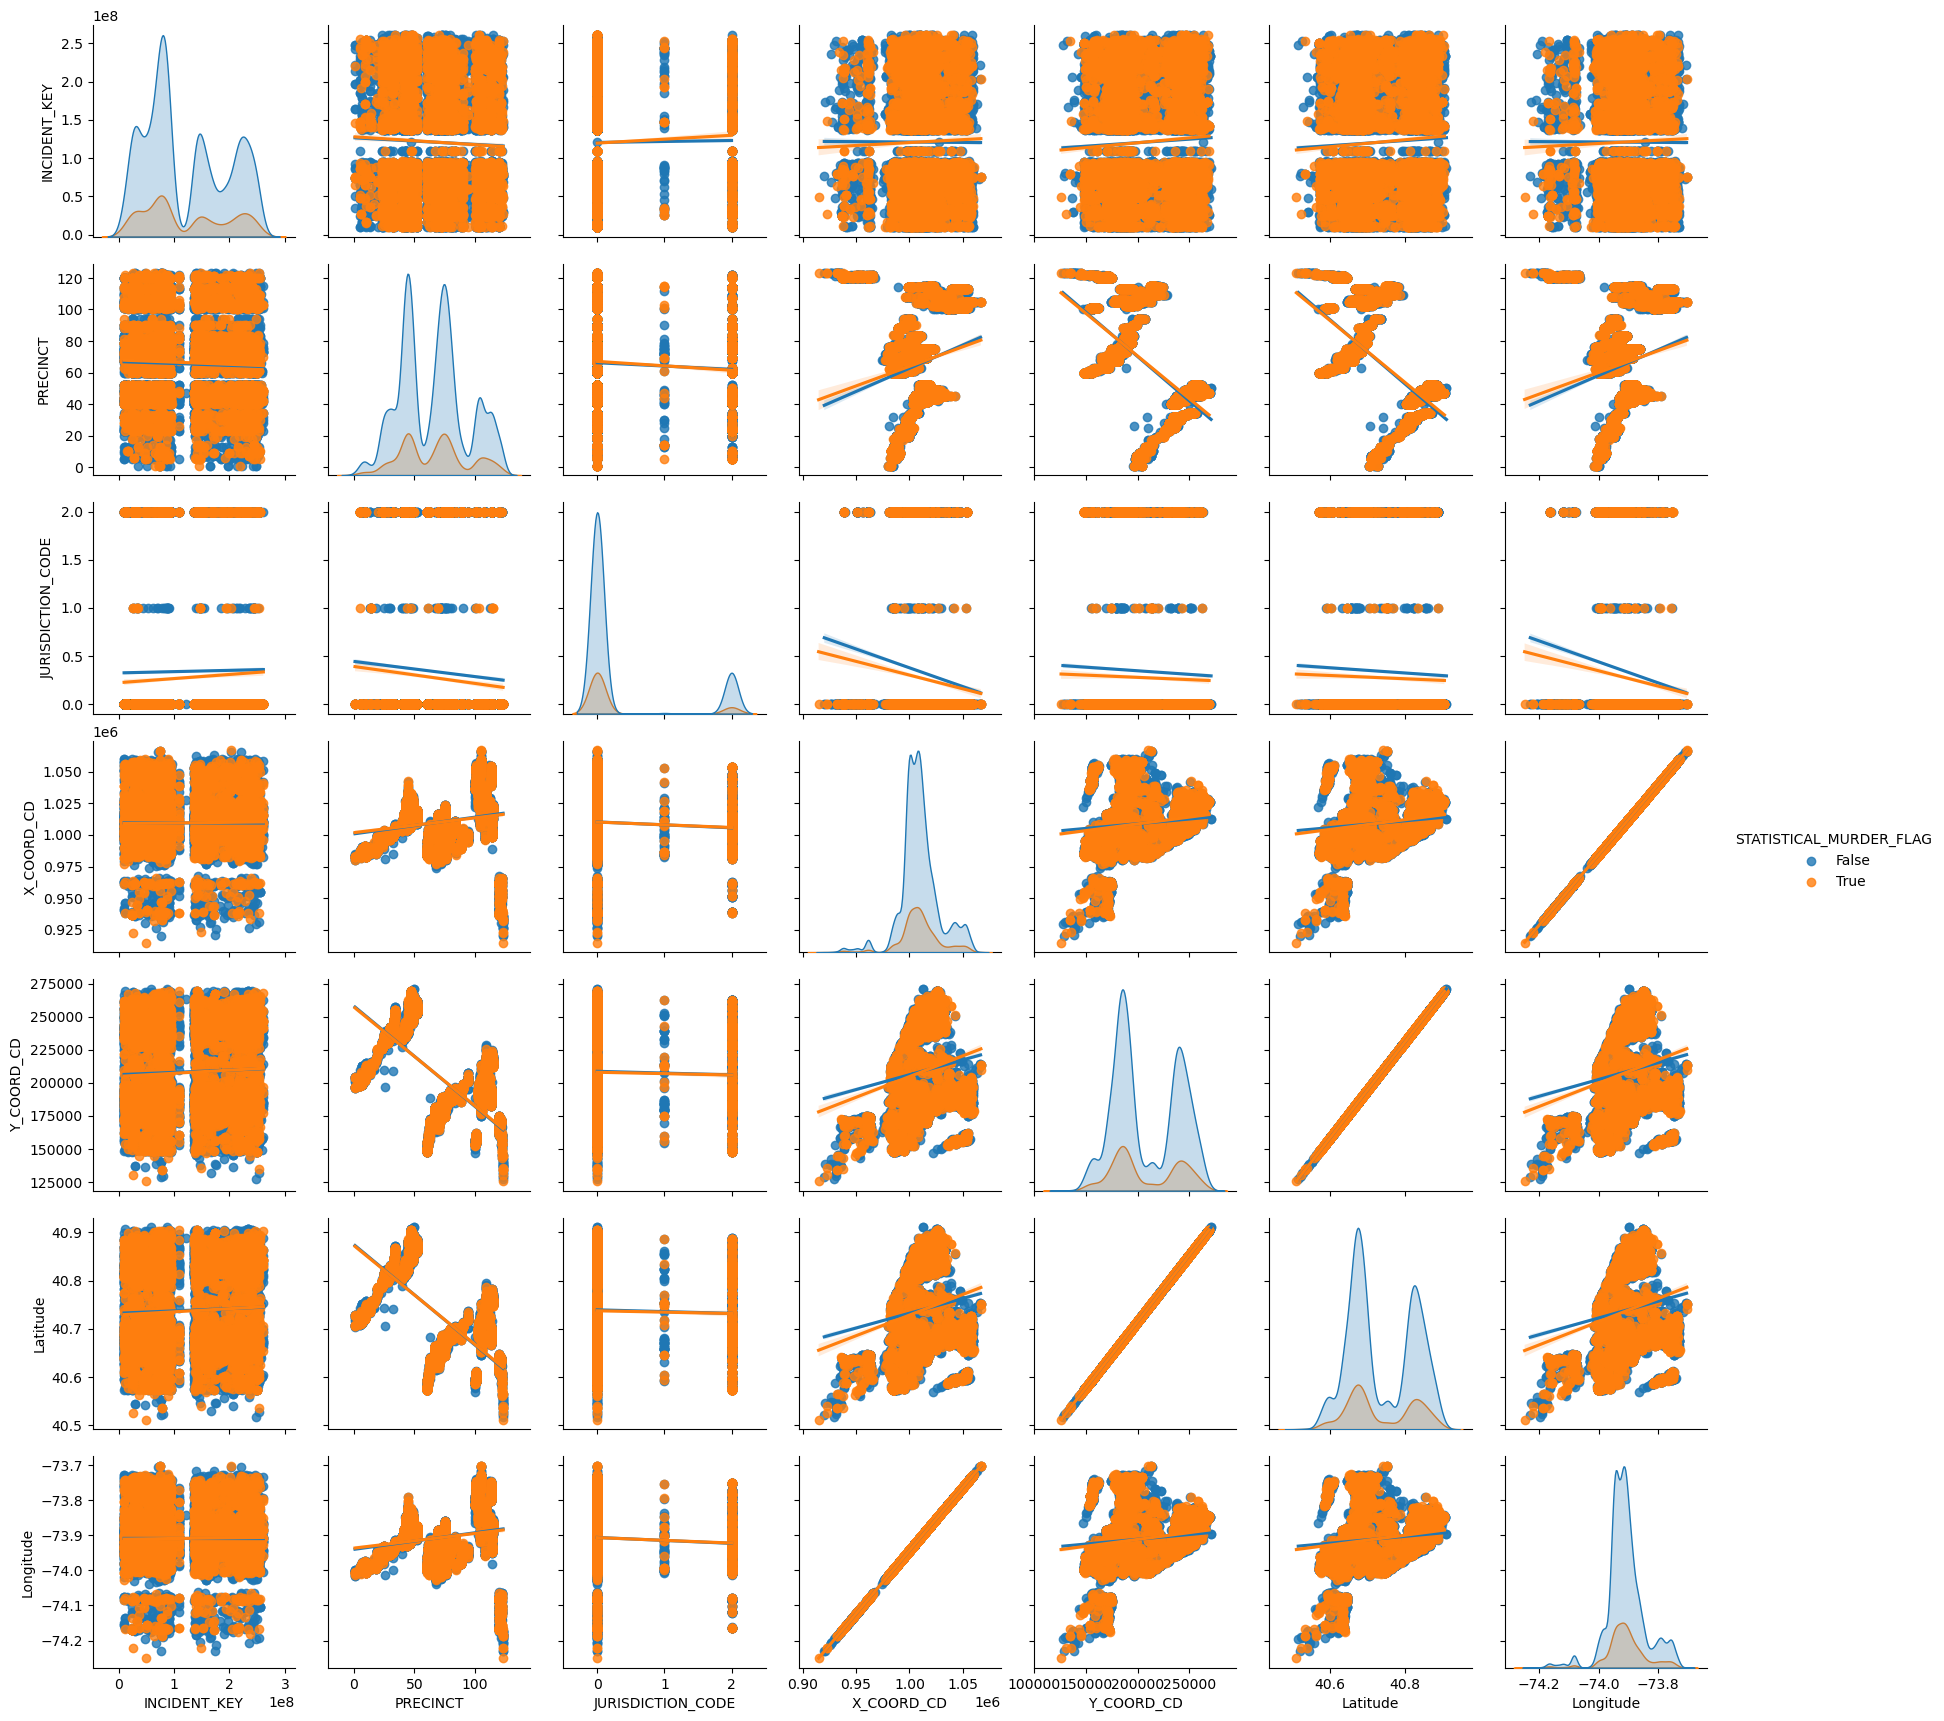

In [19]:
sns.pairplot(data, diag_kind='kde',kind ='reg', hue = 'STATISTICAL_MURDER_FLAG')

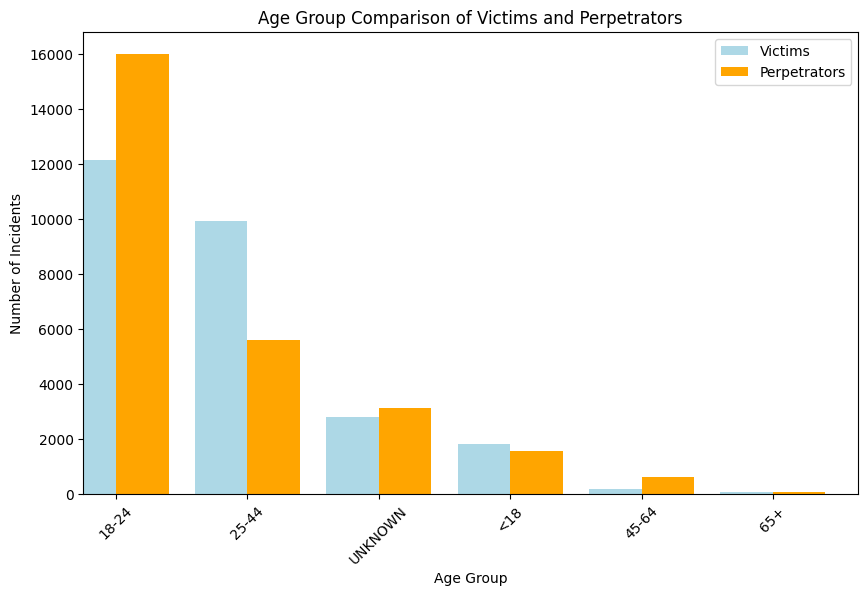

In [50]:
plt.figure(figsize=(10, 6))
victim_age_counts = data['VIC_AGE_GROUP'].value_counts()
perp_age_counts = data['PERP_AGE_GROUP'].value_counts()

victim_age_counts.plot(kind='bar', color='lightblue', width=0.4, position=1, label='Victims')
perp_age_counts.plot(kind='bar', color='orange', width=0.4, position=0, label='Perpetrators')

plt.title('Age Group Comparison of Victims and Perpetrators')
plt.xlabel('Age Group')
plt.ylabel('Number of Incidents')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Conclusion

The analysis of NYPD shooting data from 2006 to 2022 shows that 2006 had the highest number of shooting incidents, while 2018 saw the lowest number. There was a spike in shootings in 2020 followed by a declining trend in 2022. The top boroughs for shootings are Brooklyn and Bronx. The perpetrator race with the highest shootings is Black, and the most common perpetrator age groups are unknown, 18-24 years, and 25-44 years. Shootings most frequently occur on Saturday and Sunday mornings.

# Recommendations:

1. Increase patrols and anti-violence programs in Brooklyn and Bronx to continue reducing shootings in the highest risk boroughs.

2. Focus youth engagement and development programs towards the 18-24 and 25-44 age groups to provide legal alternatives and opportunities.

3. Examine root causes and potential biases that may contribute to the disproportionately high shooting rates by Black perpetrators compared to the NYC population.

4. Scale up community-based anti-violence initiatives and mediation programs shown to be effective at reducing gun violence.

5. Conduct further analysis to identify specific locations, times and situational factors during Saturday and Sunday mornings that see the most gun violence. Target resources to those high-risk areas.

6. Enhance tracing and tracking of illegal firearms flowing into NYC to reduce access among high-risk individuals and neighborhoods.

### Challenges

1. Incorrect Data Type
2. Incorrect formatting
3. Handling null values

**To Summarized, a coordinated effort is needed between NYPD and community organizations to engage at-risk youth, promote gun safety, and provide targeted resources to locations and demographics susceptible to gun violence based on data insights.**